# Análise de Dados Exploratória do Titanic

![titanic](img/titanic_historical.jpg "Pintura do Titanic")

# 1. Introdução

O RMS Titanic foi um navio de passageiros britânico operado pela empresa *White Star Line* que afundou no Oceano Atlântico Norte nas primeiras horas da manhã de 15 de abril de 1912, depois de atingir um iceberg durante sua viagem inaugural de Southampton a Nova York. Dos 2.224 passageiros e tripulantes a bordo, mais de 1.500 morreram, tornando o naufrágio um dos desastres marítimos comerciais mais mortais da história moderna em tempos de paz.

Neste estudo iremos explorar um conjunto de dados baseado na lista de passageiros do Titanic editada por Michael A. Findlay, publicada originalmente em Eaton & Haas (1994) Titanic: Triumph and Tragedy, Patrick Stephens Ltd, e expandida com a ajuda da comunidade da Internet. Os arquivos HTML originais foram obtidos por Philip Hind (1999) e o *dataset* descreve o status de sobrevivência de passageiros individuais no Titanic. Ele não contém informações para a tripulação, mas contém idades atuais e estimadas para quase 80% dos passageiros.

## 1.1. Objetivos

O objetivo deste estudo é realizar uma Análise Exploratória dos Dados (Exploratory Data Analysis - EDA) do conjunto de dados `titanic3`, adaptado pelo autor e disponível em [data/titanic3.csv](data/titanic.csv); a fim de caracterizar o perfil dos sobreviventes do fatídico naufrágio. Especificiamente serão respondidas as seguintes questões de pesquisa:

1. [Qual é o número de Sobreviventes?](#3.1.-Qual-é-o-número-de-Sobreviventes?)
2. [Homens ou mulheres tiveram mais chances de sobreviver?](#3.2.-Homens-ou-mulheres-tiveram-mais-chances-de-sobreviver?)
3. [Qual classe social teve mais sobreviventes?](#3.3.-Qual-classe-social-teve-mais-sobreviventes?)
4. [Qual faixa etária teve mais chances de sobreviver?](#3.4.-Qual-faixa-etária-teve-mais-chances-de-sobreviver?)


# 2. Metodologia

Nesta seção será apresentado todo o processo de preparação, organização e limpeza de dados feito no *dataset* que possui os seguintes dados:

| Coluna          | Descrição                                                                 |
|-----------------|---------------------------------------------------------------------------|
| id_passageiro   | Identficador único do passageiro.                                         |
| classe          | Classe social.                                                            |
| sobreviveu      | Sobrevivente? Sim (1), Não (0).                                           |
| nome            | Nome do passageiro.                                                       |
| sexo            | Masculino (male), Feminino (female).                                      |
| idade           | Idade do passageiro.                                                      |
| irmaos_conjuges | Número de irmãos e cônjuges a bordo.                                      |
| pais_filhos     | Número de pais e filhos a bordo.                                          |
| bilhete         | Número do bilhete                                                         |
| tarifa          | Preço da tarifa do passageiro.                                            |
| cabine          | Cabine.                                                                   |
| embarque        | Nome do porto de embarque: C = Cherbourg; Q = Queenstown; S = Southampton |
| bote            | Bote salva vidas.                                                         |
| corpo           | Número de identificação do corpo.                                         |
| destino         | Local de desembarque do passageiro.                                       |

## OBSERVAÇÕES

- `classe` é uma aproximação do status socioeconômico na época, onde: 1 = Classe Alta1; 2 = Classe Média e 3 = Classe Baixa;
- `idade` está representada em anos, porém, se a idade for menor que Um (1) ou caso tenha sido estimada, ela estará com casas decimais xx.5;
- `tarifa` está em Libras esterlinas (British Pounds - £) anteriores a 1970;
- `irmaos_conjuges` e `pais_filhos`: as variáveis de relação familiar de algumas relações foram ignoradas; a seguir estão as definições usadas:
    - **Irmão**: Irmão, irmã, meio-irmão ou meia-irmã do passageiro a bordo do Titanic;
    - **Cônjuge**: Marido ou esposa do passageiro a bordo do Titanic (amantes e noivos ignorados);
    - **Pai**: Mãe ou pai do passageiro a bordo do Titanic;
    - **Criança**: Filho, Filha, Enteado ou Enteada do Passageiro a bordo do Titanic;
    - Outros parentes excluídos deste estudo incluem primos, sobrinhos / sobrinhas, tias / tios e parentes;
    - Algumas crianças viajavam apenas com uma babá, portanto foi atribuído 0 para elas em pais_filhos; 
    - Alguns viajaram com amigos ou vizinhos muito próximos em uma vila, no entanto, as definições não apóiam essas relações.


## 2.1. Configuração do Ambiente

In [26]:
import pandas as pd
import numpy as np

## 2.2. Leitura dos Dados

In [27]:
df_titanic = pd.read_csv('https://raw.githubusercontent.com/GuilhermehChaves/exercicio-titanic/main/titanic.csv');

## 2.3. Organização e Limpeza dos Dados

### 2.3.1. Visão Geral do Conjunto de Dados

In [28]:
df_titanic.head()

,id_passageiro,classe,sobreviveu,nome,sexo,idade,irmaos_conjuges,pais_filhos,bilhete,tarifa,cabine,embarque,bote,corpo,destino
0,1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,2,1,1,"Allison, Master. Hudson Trevor",male,1.0,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### 2.3.2 Remoção de Colunas
Remoção de colunas incompletas e/ou desnecessárias para a análise.

In [29]:
df_titanic = df_titanic.drop(columns=['id_passageiro', 'nome', 'corpo'], axis=1)
df_titanic.head(5)

,classe,sobreviveu,sexo,idade,irmaos_conjuges,pais_filhos,bilhete,tarifa,cabine,embarque,bote,destino
0,1,1,female,29.0,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,male,1.0,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"


### 2.3.3. Dados Ausentes

#### 2.3.3.1 Idades Ausentes
Para os dados ausentes da coluna `idade` será feita a substituição dos dados vazios pela média das idades na época.

In [30]:
def age(row):
  if row['idade'] == 'NaN' or row['idade'] == '' or row['idade'] == None:
    return row['idade'].mean()

df_titanic.apply(age, axis=1)
df_titanic.head(5)

,classe,sobreviveu,sexo,idade,irmaos_conjuges,pais_filhos,bilhete,tarifa,cabine,embarque,bote,destino
0,1,1,female,29.0,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,male,1.0,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"


#### 2.3.3.2 Tarifas Ausentes
Para os dados ausentes da coluna `tarifa`será feita a substituição dos dados vazios pela média de preço das tarifas na época.

In [31]:
def tariff(row):
  if row['tarifa'] == 'NaN' or row['tarifa'] == '' or row['tarifa'] == None:
    return row['tarifa'].mean()

df_titanic.apply(tariff, axis=1)
df_titanic.head(5)

,classe,sobreviveu,sexo,idade,irmaos_conjuges,pais_filhos,bilhete,tarifa,cabine,embarque,bote,destino
0,1,1,female,29.0,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,male,1.0,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"


#### 2.3.3.3 Portos de Embarque Ausentes
Para os dados ausentes da coluna `embarque`será feita a remoção dos dados vazios.

In [ ]:
def boarding(b):
  return b != "" or b != None

df_titanic[df_titanic['embarque'].apply(boarding)]

## 2.4. Mapeamento de Dados
Para melhorar a análise e interpretação dos dados os seguintes atributos serão modificados:

| Coluna    | Original     | Modificado                          |
|:----------|:-------------|:------------------------------------|
| Classe    | 1, 2, 3      | Alta, Média, Baixa                  |
| Sexo      | male, female | M, F                                |
| Embarque  | C, Q, S      | Cherbourg, Queenstown, Southampton  |


In [ ]:
def modifyClass(classe):
  if classe == 1:
    return 'Alta'
  if classe == 2:
    return 'Média'
  if classe == 3:
    return 'Baixa'

def modifySex(sex):
  return 'F' if sex == 'female' else 'M'

def modifyBoarding(boarding):
  if boarding == 'C':
    return 'Cherbourg'
  if boarding == 'Q':
    return 'Queenstown'
  if boarding == 'S':
    return 'Southampton'

df_titanic['classe'] = df_titanic['classe'].apply(modifyClass)
df_titanic['sexo'] = df_titanic['sexo'].apply(modifySex)
df_titanic['embarque'] = df_titanic['embarque'].apply(modifyBoarding)
df_titanic.head(5)

## 2.5.  Feature Engineering

A engenharia de recursos (*Feature Engineering*) é o processo de usar o conhecimento do domínio para extrair recursos dos dados brutos. Neste estudo serão acrescentadas as seguintes colunas para enriquecer a análise de dados:

| Coluna         | Descrição                                                         |
|:---------------|:------------------------------------------------------------------|
| total_parentes | Número total de parentes a bordo: `irmaos_conjuges + pais_filhos` |
| faixa_etaria   | Intervalo de idades dos passageiros.                              |

### 2.5.1 Total de Parentes

In [ ]:
def sumRelatives(row):
  return row['irmaos_conjuges'] + row['pais_filhos']

df_titanic['total_parentes'] = df_titanic.apply(sumRelatives, axis=1)
df_titanic.head(5)

,classe,sobreviveu,sexo,idade,irmaos_conjuges,pais_filhos,bilhete,tarifa,cabine,embarque,bote,destino,total_parentes
0,Alta,1,F,29.0,0,0,24160,211.3375,B5,Southampton,2,"St Louis, MO",0
1,Alta,1,M,1.0,1,2,113781,151.5500,C22 C26,Southampton,11,"Montreal, PQ / Chesterville, ON",3
2,Alta,0,F,2.0,1,2,113781,151.5500,C22 C26,Southampton,NaN,"Montreal, PQ / Chesterville, ON",3
3,Alta,0,M,30.0,1,2,113781,151.5500,C22 C26,Southampton,NaN,"Montreal, PQ / Chesterville, ON",3
4,Alta,0,F,25.0,1,2,113781,151.5500,C22 C26,Southampton,NaN,"Montreal, PQ / Chesterville, ON",3


### 2.5.2 Faixas Etárias

# 3. Análise dos Dados

## 3.1. Qual é o número de Sobreviventes?

In [ ]:
df_survivors = df_titanic.query('sobreviveu == 1')
df_survivors.shape[0]

500

## 3.2. Homens ou mulheres tiveram mais chances de sobreviver?

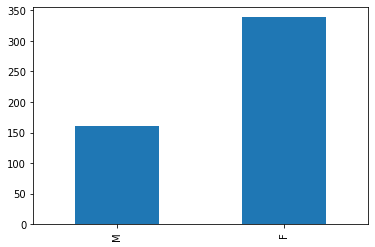

In [ ]:
df_survivors['sexo'].value_counts().sort_values().plot(kind='bar')
# Mulheres

## 3.3. Qual classe social teve mais sobreviventes?

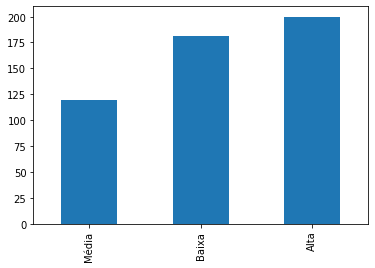

In [ ]:
df_survivors['classe'].value_counts().sort_values().plot(kind='bar')
# Alta

## 3.4. Qual faixa etária teve mais chances de sobreviver?

# REFERÊNCIAS

- [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data)
- [Encyclopedia Titanica](https://www.encyclopedia-titanica.org/)
- [Basic Feature Engineering with the Titanic Data](https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/)
- Hind, Philip.  "Encyclopedia Titanica."  Online.  Internet. n.p.  02 Aug 1999.